In [1]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from datetime import datetime, timedelta
# from sklearn.neighbors import KernelDensity
from IPython.display import set_matplotlib_formats
import numpy as np


set_matplotlib_formats('retina')

/var/folders/t8/gtqjgg0n60jdkgk801tvsrx40000gn/T/ipykernel_23137/2645095783.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
df_lockdown1 = pd.read_csv("./data/lockdown1.csv")
df_lockdown2 = pd.read_csv("./data/lockdown2.csv")
df_normal = pd.read_csv("./data/normal07_10.csv")

/var/folders/t8/gtqjgg0n60jdkgk801tvsrx40000gn/T/ipykernel_23137/1299928494.py:2: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lockdown2 = pd.read_csv("./data/lockdown2.csv")
/var/folders/t8/gtqjgg0n60jdkgk801tvsrx40000gn/T/ipykernel_23137/1299928494.py:3: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_normal = pd.read_csv("./data/normal07_10.csv")


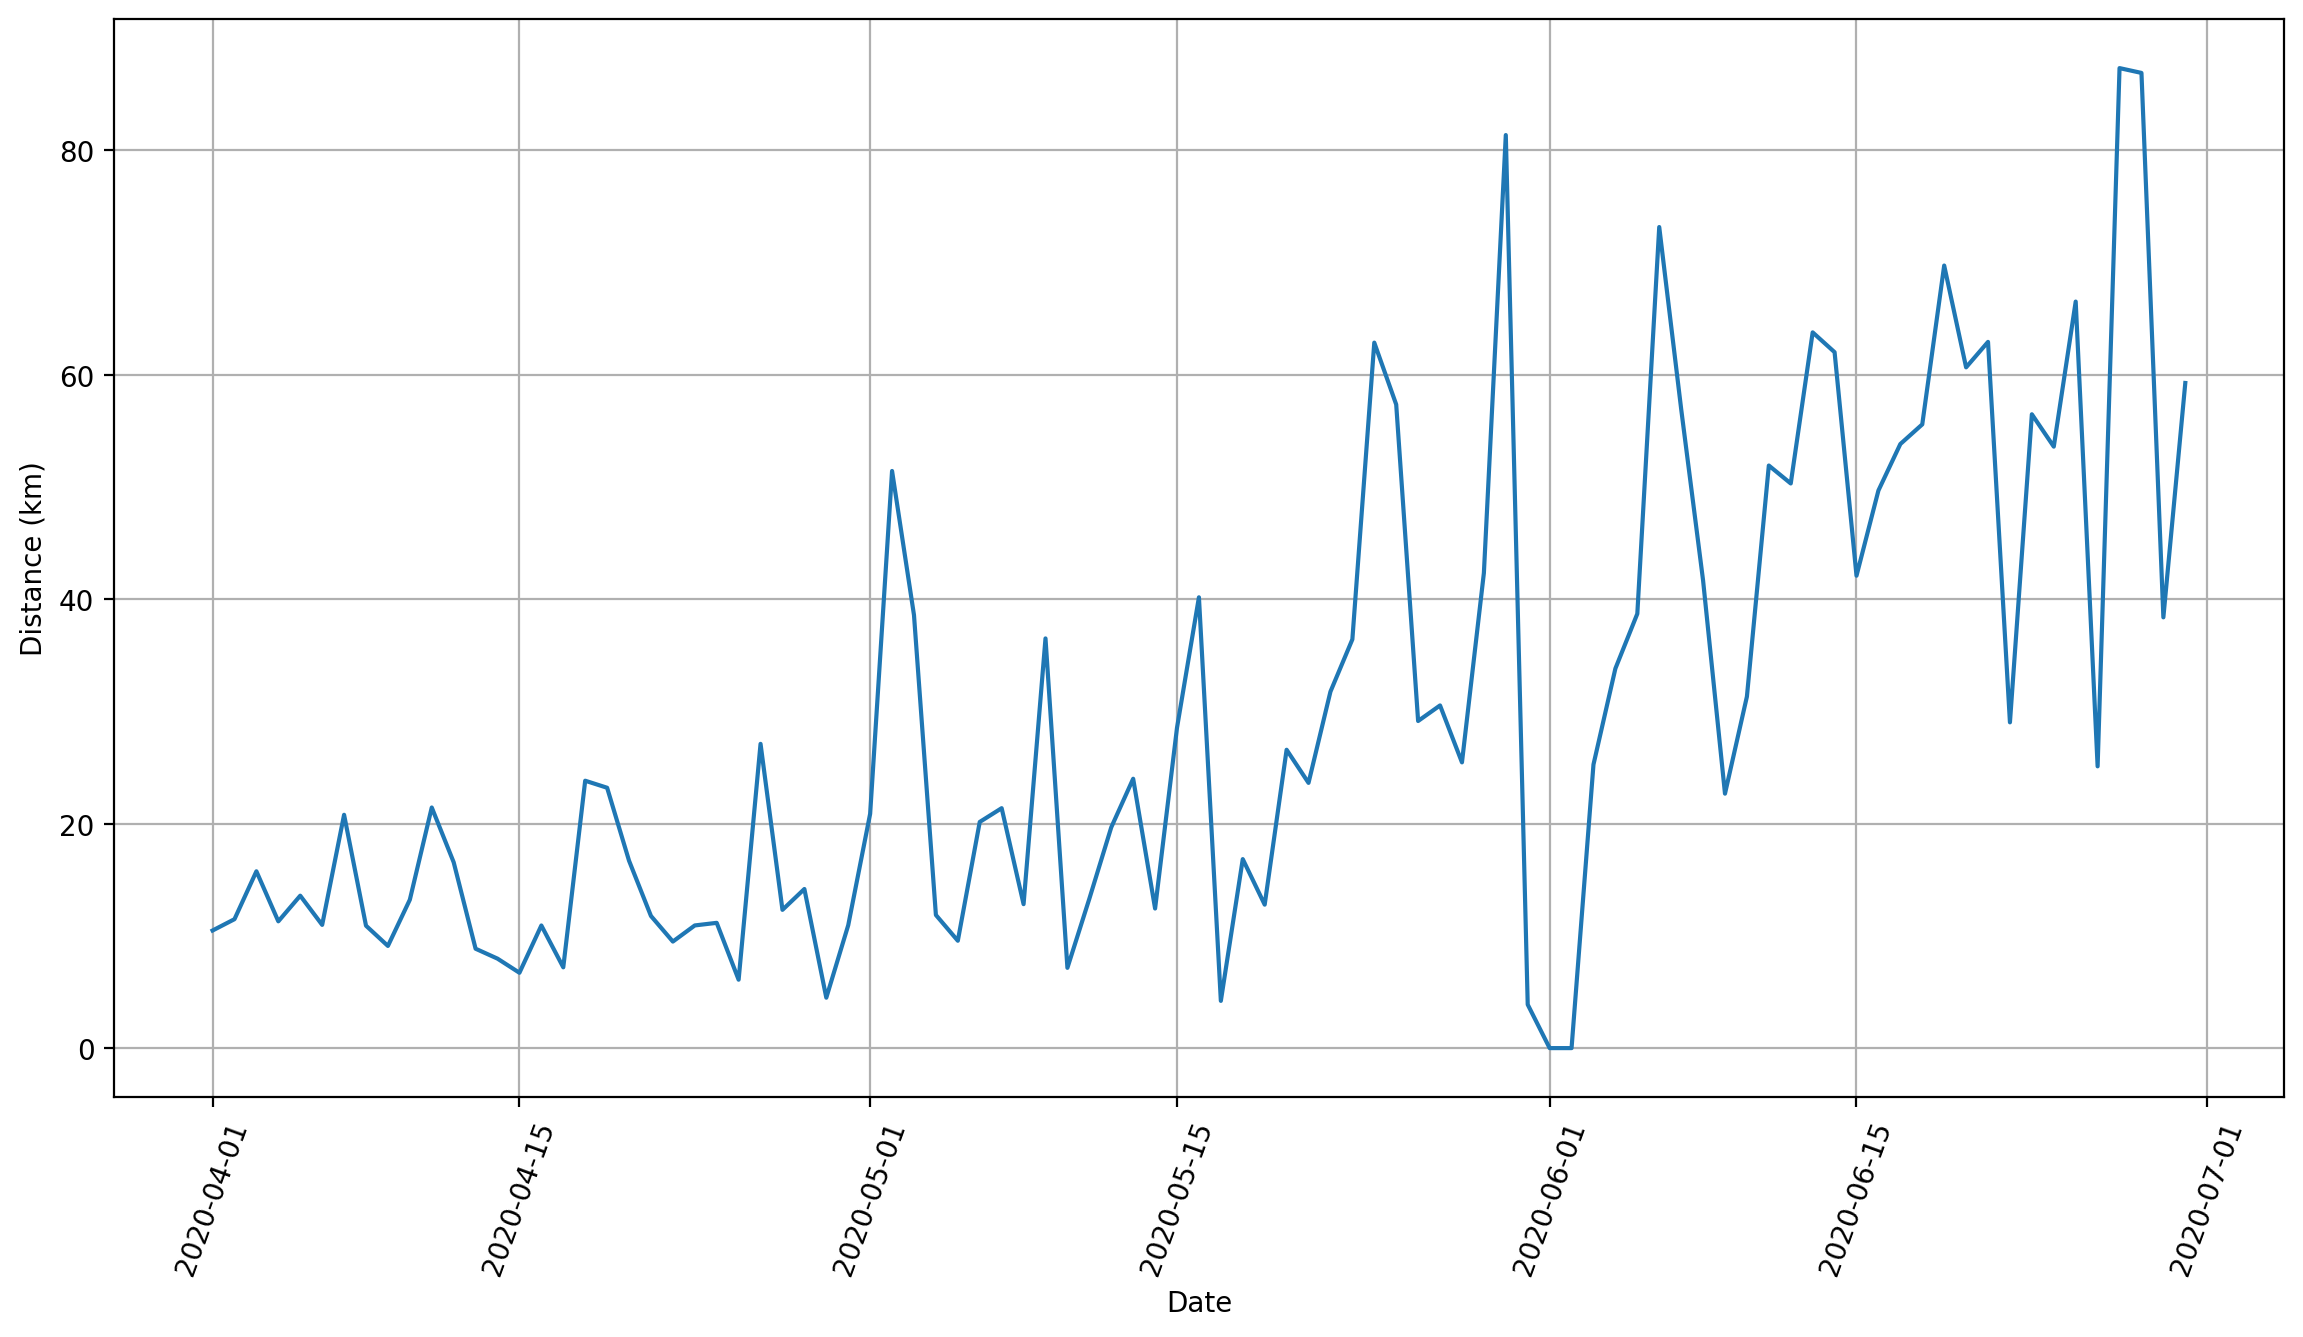

In [9]:
# 重みづけなし
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    # 距離をユニークな数のノード数で割る
    distance_list.append(subset["distance"].sum()/len(subset["start_station_name"].unique())) if len(subset["start_station_name"].unique()) != 0 else distance_list.append(0)

    # update timestamp
    current_timestamp = next_timestamp
  
# 日付のリストを作成する
date_list = []
current_timestamp = df_lockdown1['started_at'].min()
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # Add to new dataset
    date_list.append(current_timestamp)
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval
    
    # update timestamp
    current_timestamp = next_timestamp

# 日付と平均距離のプロットを作成する
plt.figure(figsize=(14,7))
plt.plot(date_list, distance_list)
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("Distance (km)")
plt.grid()
plt.show()


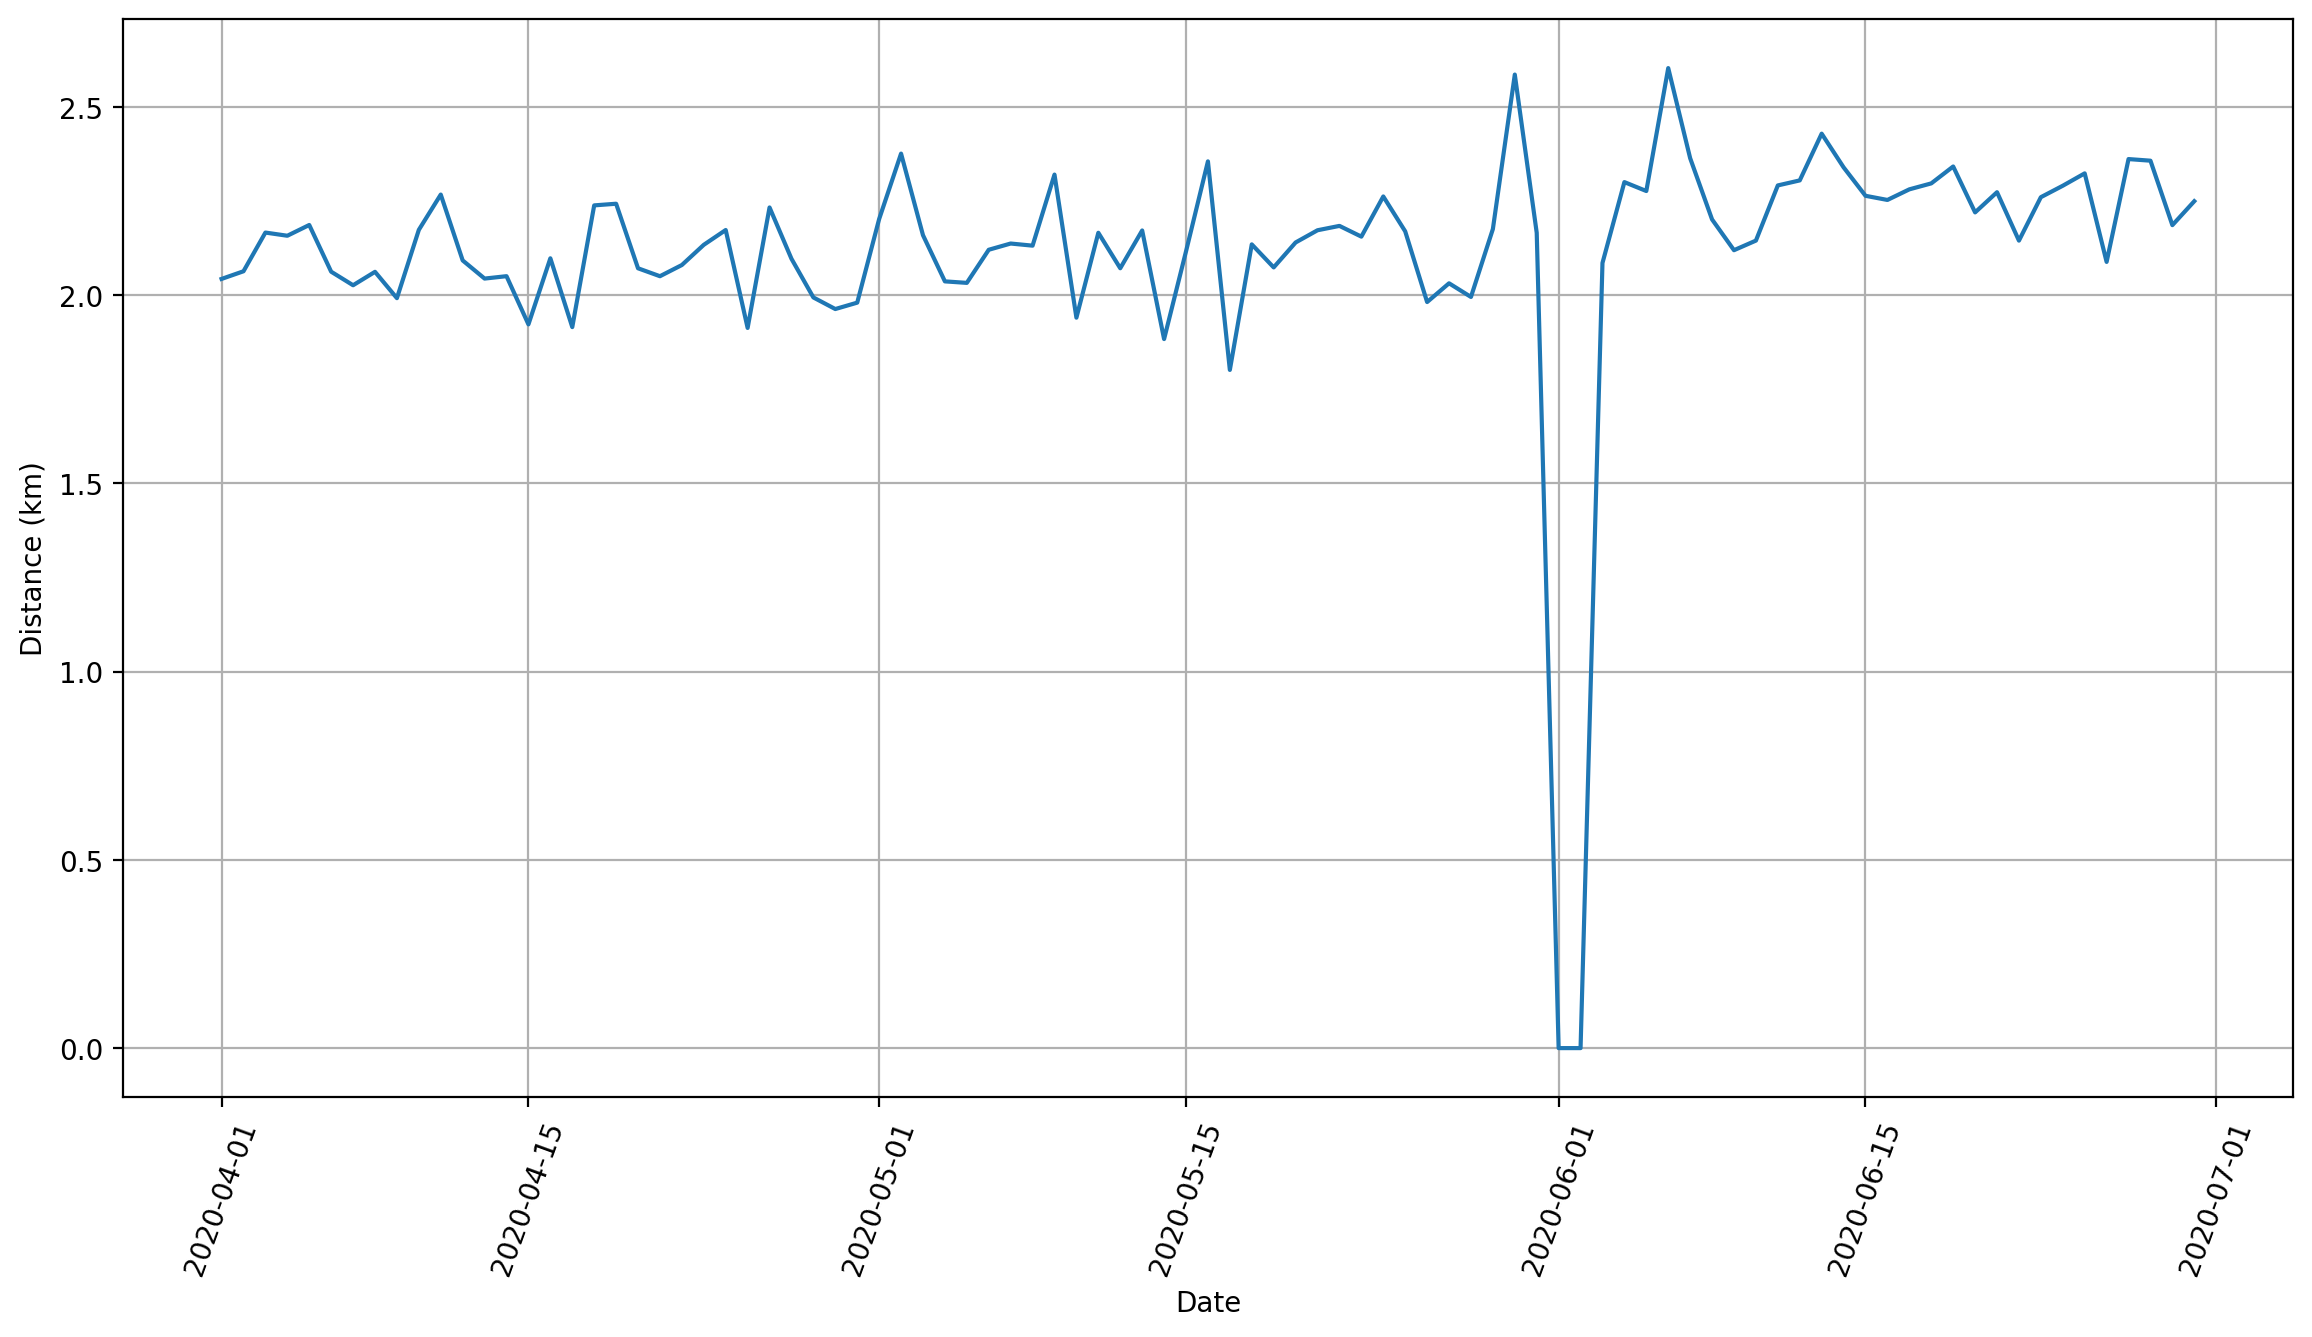

In [11]:
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)

    # update timestamp
    current_timestamp = next_timestamp
  
# 日付のリストを作成する
date_list = []
current_timestamp = df_lockdown1['started_at'].min()
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # Add to new dataset
    date_list.append(current_timestamp)
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval
    
    # update timestamp
    current_timestamp = next_timestamp

# 日付と平均距離のプロットを作成する
plt.figure(figsize=(14,7))
plt.plot(date_list, distance_list)
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("Distance (km)")
plt.grid()
plt.show()


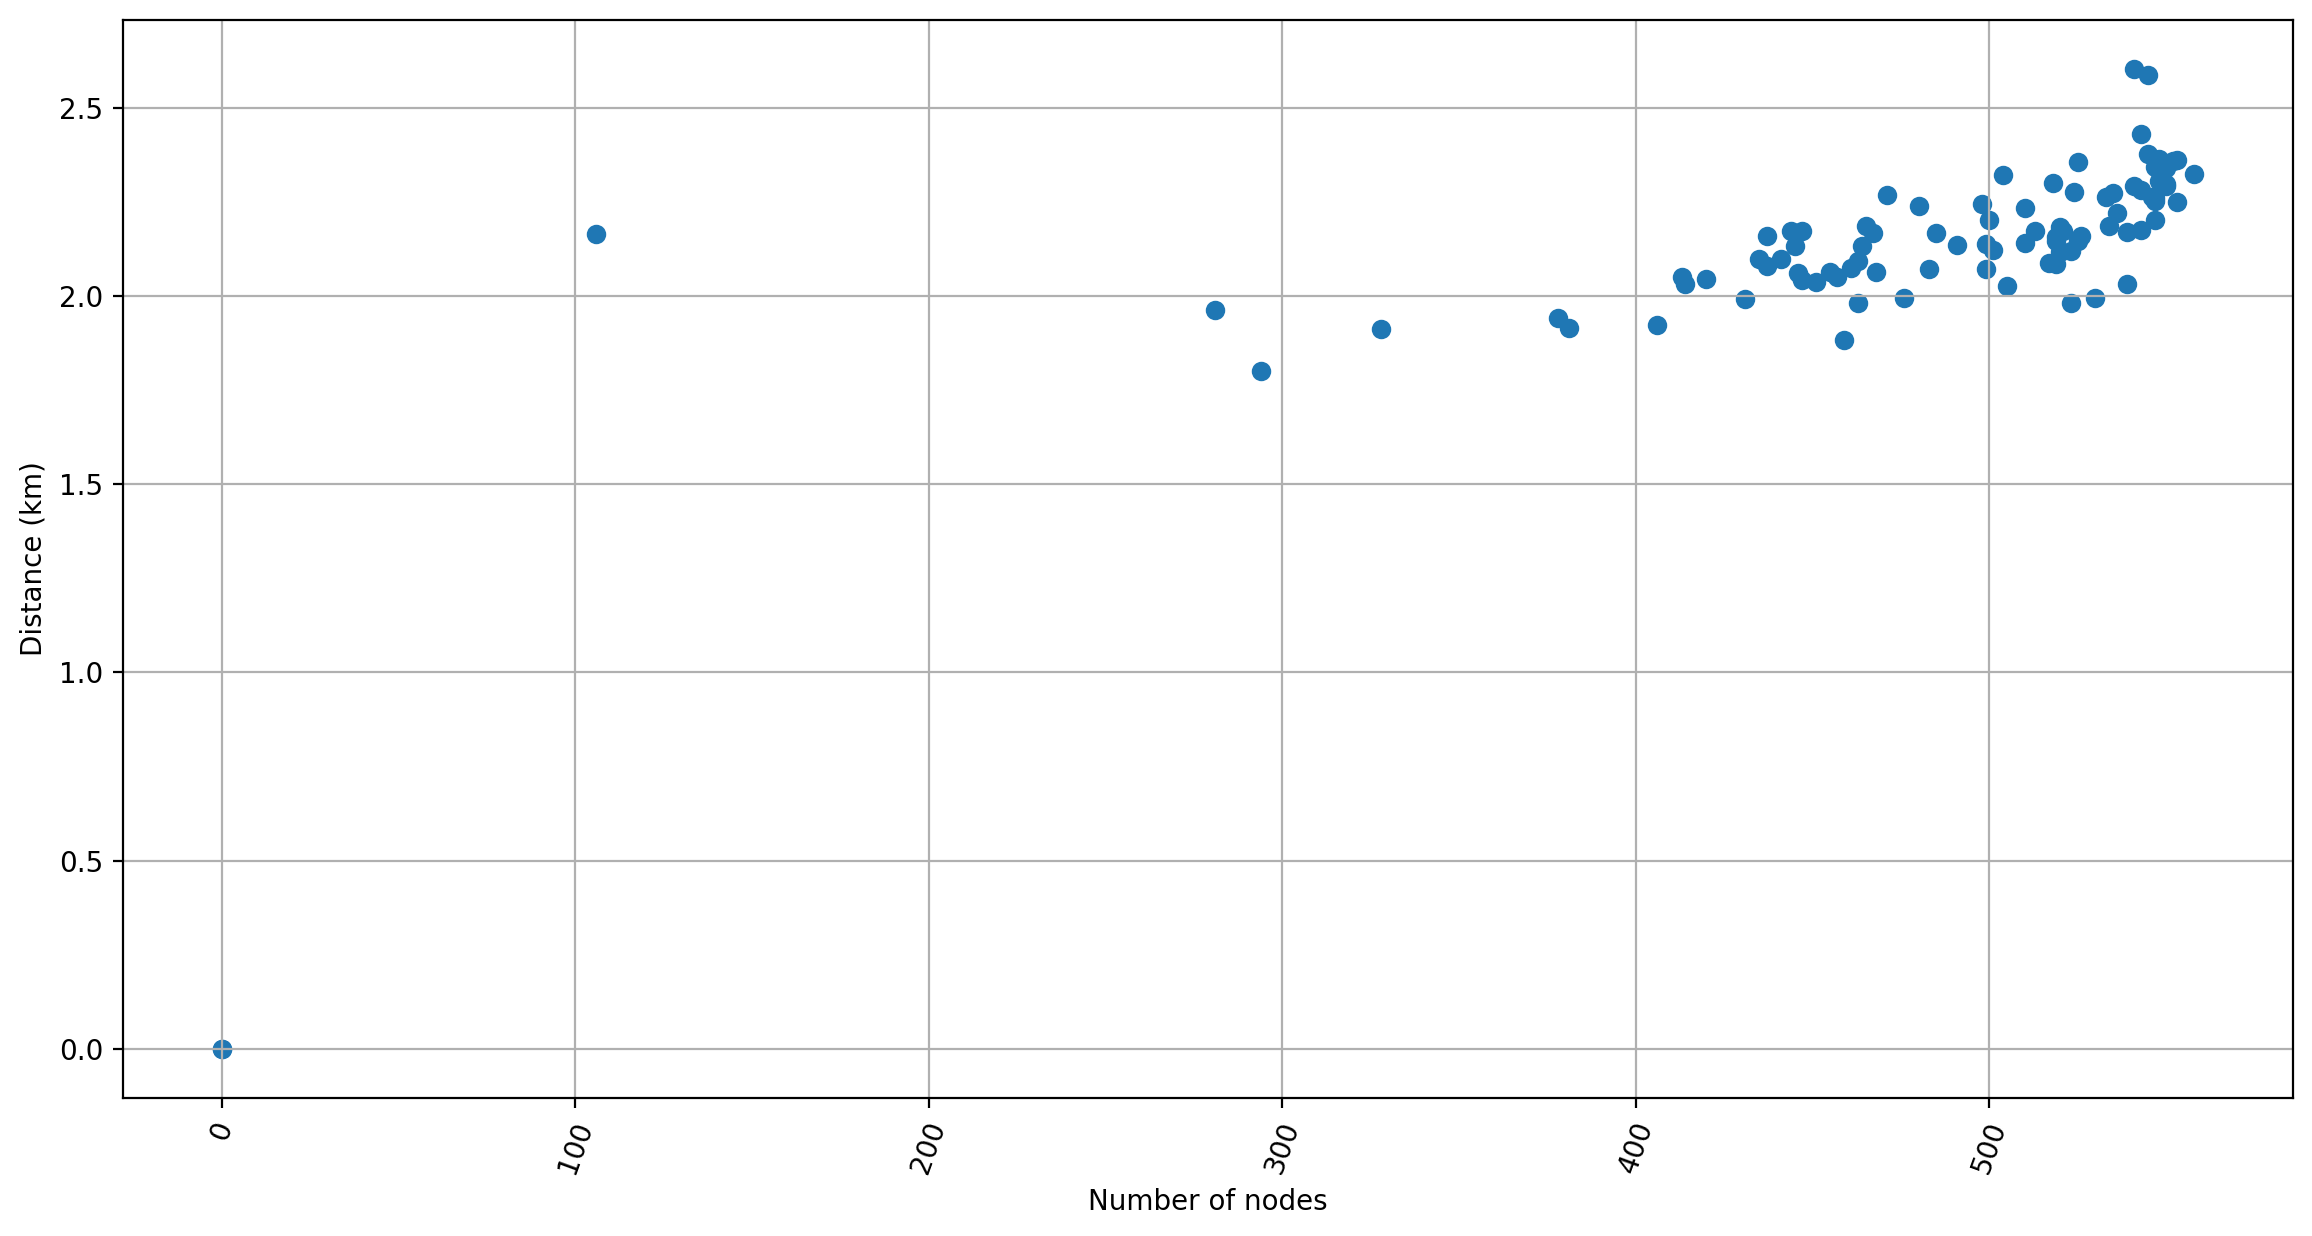

In [6]:
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list.append(len(subset["start_station_name"].unique()))

    # update timestamp
    current_timestamp = next_timestamp

# 45度の直線をプロットする
# x = np.arange(0.1, 3, 0.1)
# y = x
plt.figure(figsize=(14,7))
# plt.plot(x, y, color='red')
plt.scatter(node_list, distance_list, label="lockdown 1")
plt.xticks(rotation=70)
plt.xlabel("Number of nodes")
plt.ylabel("Distance (km)")
plt.grid()
plt.show()

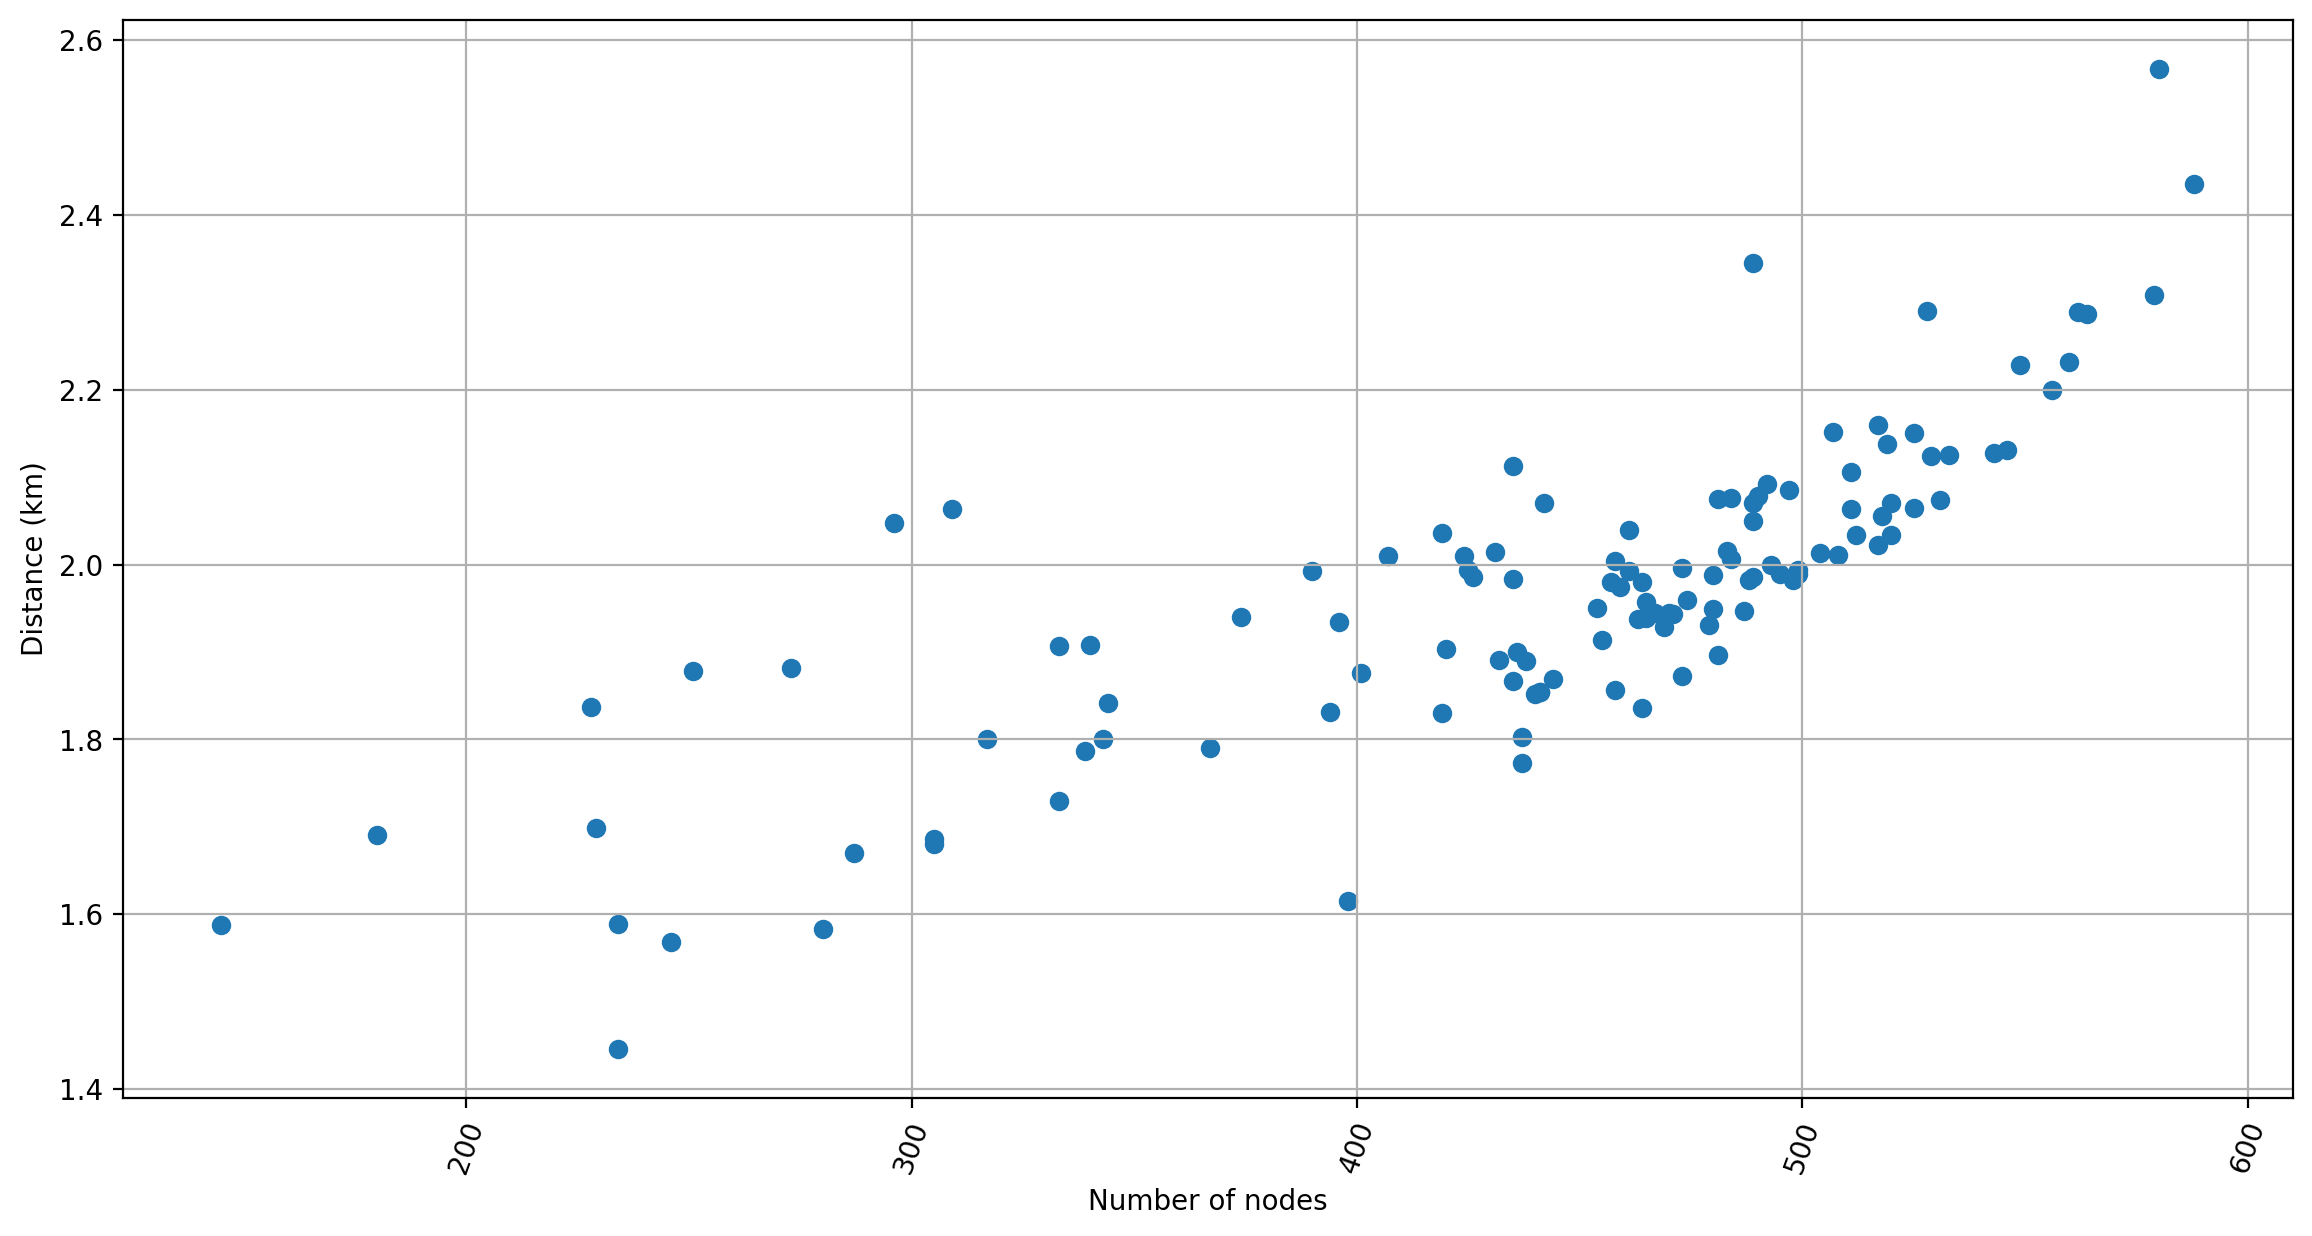

In [9]:
# df_lockdown2
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_lockdown2["started_at"] = pd.to_datetime(df_lockdown2["started_at"])
current_timestamp = df_lockdown2['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown2["started_at"].max())
end_timestamp = df_lockdown2["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown2[(df_lockdown2['started_at'] >= current_timestamp) & (df_lockdown2['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list = []
# current_timestampをdatetime型に変換する
df_lockdown2["started_at"] = pd.to_datetime(df_lockdown2["started_at"])
current_timestamp = df_lockdown2['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown2["started_at"].max())
end_timestamp = df_lockdown2["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown2[(df_lockdown2['started_at'] >= current_timestamp) & (df_lockdown2['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list.append(len(subset["start_station_name"].unique()))

    # update timestamp
    current_timestamp = next_timestamp

# 45度の直線をプロットする
# x = np.arange(0.1, 3, 0.1)
# y = x
plt.figure(figsize=(14,7))
# plt.plot(x, y, color='red')
plt.scatter(node_list, distance_list)
plt.xticks(rotation=70)
plt.xlabel("Number of nodes")
plt.ylabel("Distance (km)")
plt.grid()
plt.show()

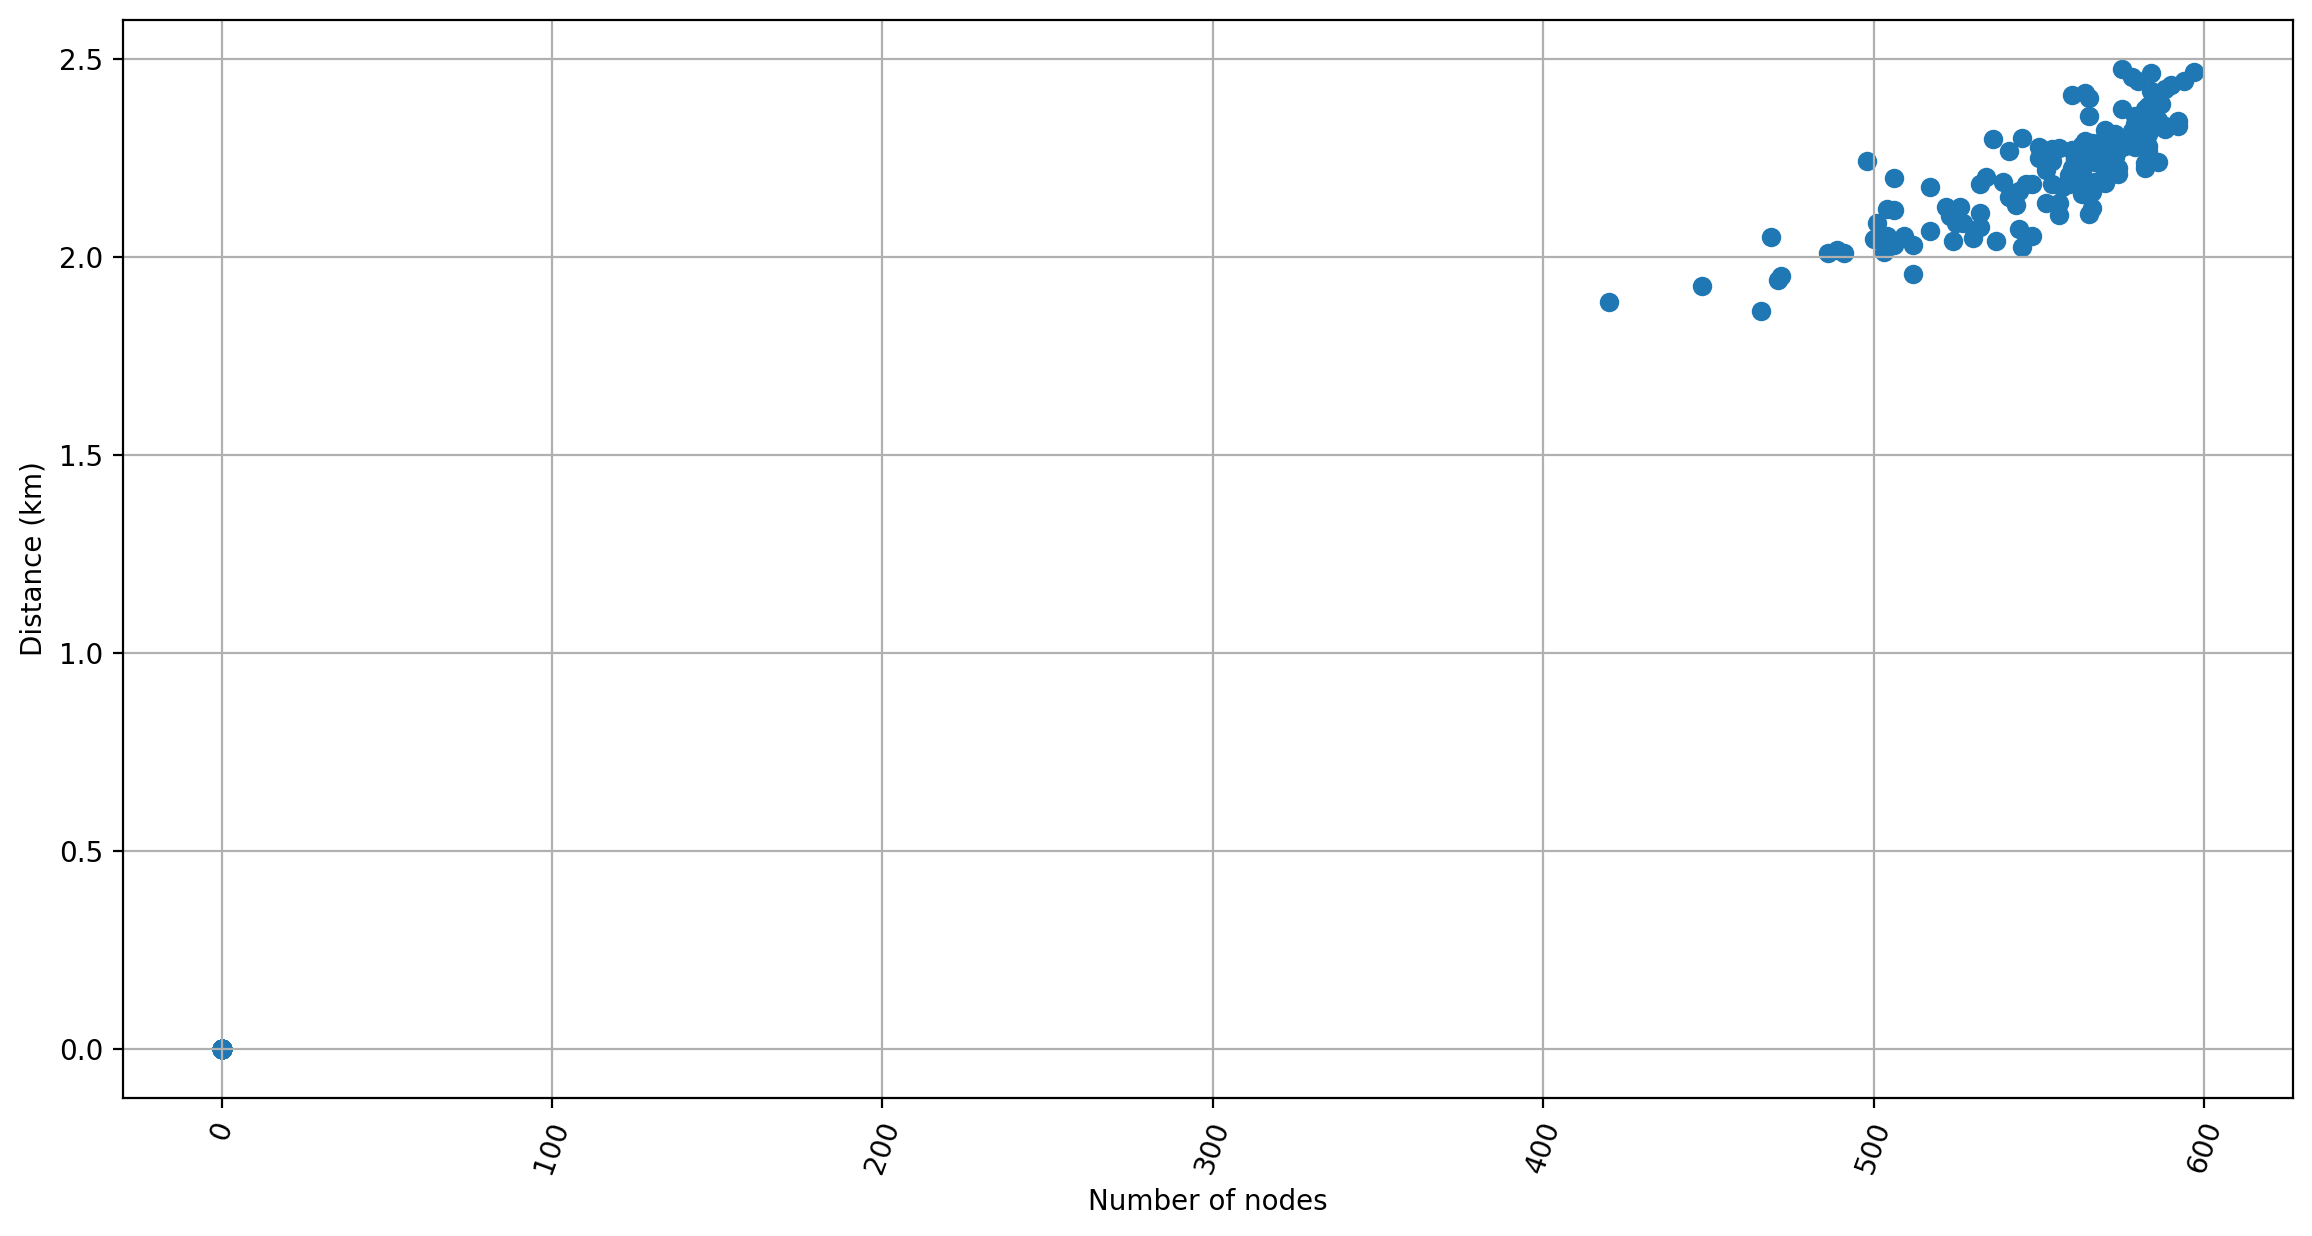

In [11]:
# df_lockdown2
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_normal["started_at"] = pd.to_datetime(df_normal["started_at"])
current_timestamp = df_normal['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_normal["started_at"].max())
end_timestamp = df_normal["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_normal[(df_normal['started_at'] >= current_timestamp) & (df_normal['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list = []
# current_timestampをdatetime型に変換する
df_normal["started_at"] = pd.to_datetime(df_normal["started_at"])
current_timestamp = df_normal['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_normal["started_at"].max())
end_timestamp = df_normal["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_normal[(df_normal['started_at'] >= current_timestamp) & (df_normal['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list.append(len(subset["start_station_name"].unique()))

    # update timestamp
    current_timestamp = next_timestamp

# 45度の直線をプロットする
# x = np.arange(0.1, 3, 0.1)
# y = x
plt.figure(figsize=(14,7))
# plt.plot(x, y, color='red')
plt.scatter(node_list, distance_list)
plt.xticks(rotation=70)
plt.xlabel("Number of nodes")
plt.ylabel("Distance (km)")
plt.grid()
plt.show()

<Figure size 1400x700 with 0 Axes>

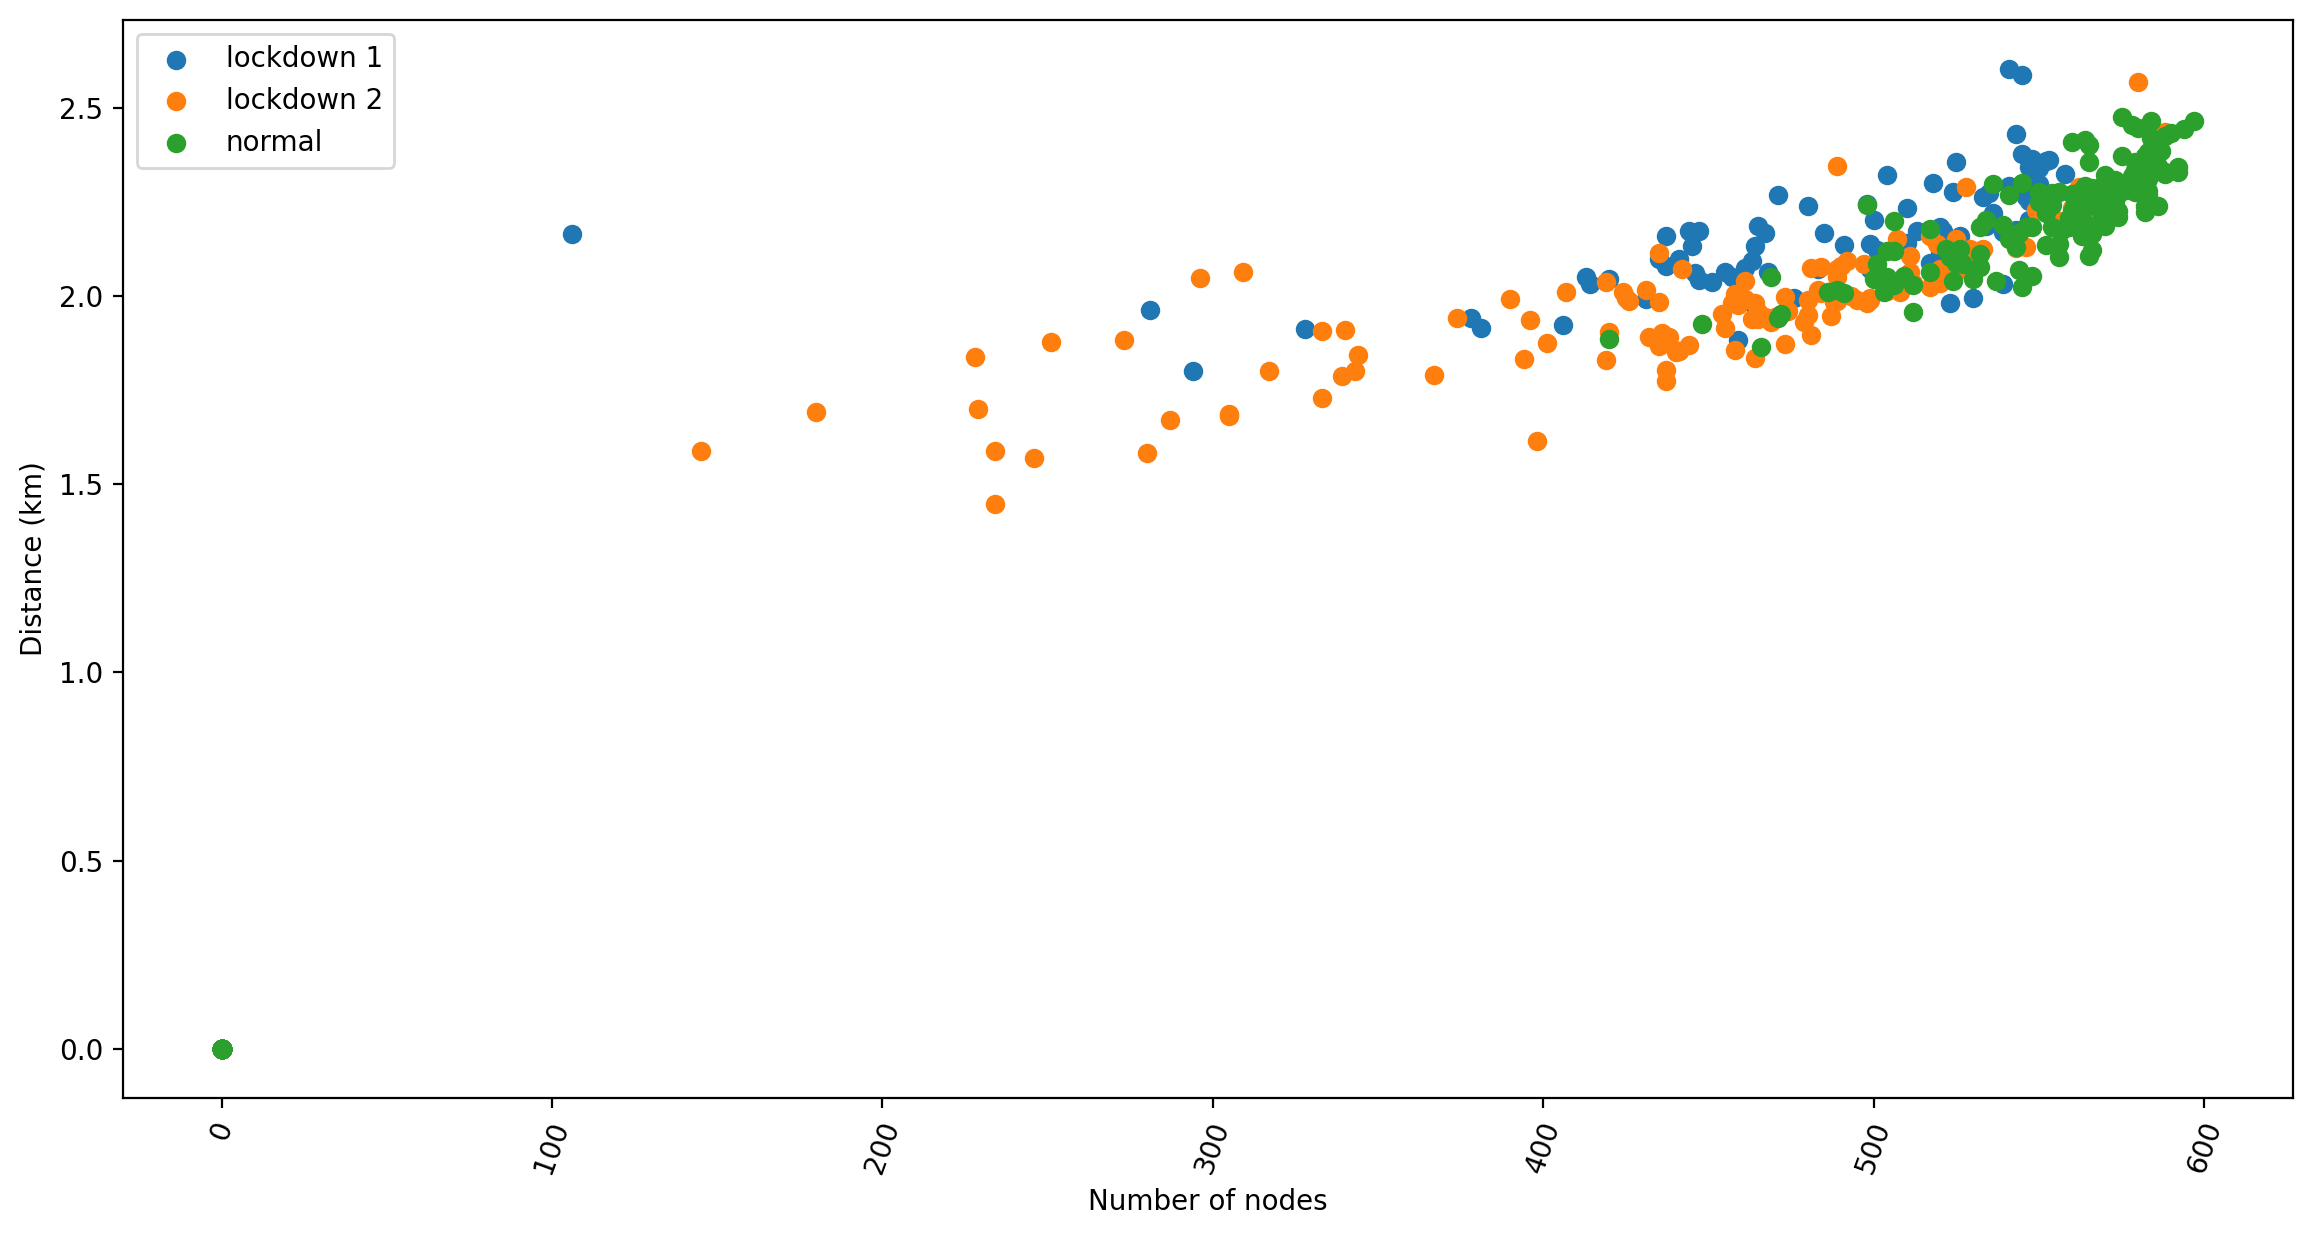

In [5]:
# Mix
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)
    # distance_list = [x for x in distance_list if x != 0]

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list = []
# current_timestampをdatetime型に変換する
df_lockdown1["started_at"] = pd.to_datetime(df_lockdown1["started_at"])
current_timestamp = df_lockdown1['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown1["started_at"].max())
end_timestamp = df_lockdown1["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown1[(df_lockdown1['started_at'] >= current_timestamp) & (df_lockdown1['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list.append(len(subset["start_station_name"].unique()))

    # update timestamp
    current_timestamp = next_timestamp


# df_lockdown2
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list2 = []
# current_timestampをdatetime型に変換する
df_lockdown2["started_at"] = pd.to_datetime(df_lockdown2["started_at"])
current_timestamp = df_lockdown2['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown2["started_at"].max())
end_timestamp = df_lockdown2["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown2[(df_lockdown2['started_at'] >= current_timestamp) & (df_lockdown2['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list2.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)
    # distance_list2 = [x for x in distance_list2 if x != 0]

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list2 = []
# current_timestampをdatetime型に変換する
df_lockdown2["started_at"] = pd.to_datetime(df_lockdown2["started_at"])
current_timestamp = df_lockdown2['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_lockdown2["started_at"].max())
end_timestamp = df_lockdown2["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_lockdown2[(df_lockdown2['started_at'] >= current_timestamp) & (df_lockdown2['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list2.append(len(subset["start_station_name"].unique()))

    # update timestamp
    current_timestamp = next_timestamp


# df_lockdown2
# 各日でx軸にノード数、y軸に平均距離を取ったプロットを作成する
# started_atを基に、一日ごとの平均距離を計算してリストに入れる
distance_list3 = []
# current_timestampをdatetime型に変換する
df_normal["started_at"] = pd.to_datetime(df_normal["started_at"])
current_timestamp = df_normal['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_normal["started_at"].max())
end_timestamp = df_normal["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_normal[(df_normal['started_at'] >= current_timestamp) & (df_normal['started_at'] < next_timestamp)]

    # Add to new dataset
    distance_list3.append(subset["distance"].mean() if len(subset["start_station_name"].unique()) != 0 else 0)
    # 要素が0であるものを除外する
    # distance_list3 = [x for x in distance_list3 if x != 0]

    # update timestamp
    current_timestamp = next_timestamp

# started_atを基に、一日ごとのノード数を計算してリストに入れる
node_list3 = []
# current_timestampをdatetime型に変換する
df_normal["started_at"] = pd.to_datetime(df_normal["started_at"])
current_timestamp = df_normal['started_at'].min()
# end_timestampをdatetime型に変換する
end_timestamp = pd.to_datetime(df_normal["started_at"].max())
end_timestamp = df_normal["started_at"].max()
interval = timedelta(days=1)

while current_timestamp <= end_timestamp:
    # current timestamp plus interval
    next_timestamp = current_timestamp + interval

    # Extract data whose timestamps fall within the range from the current timestamp to the timestamp interval time later
    subset = df_normal[(df_normal['started_at'] >= current_timestamp) & (df_normal['started_at'] < next_timestamp)]

    # Add to new dataset
    node_list3.append(len(subset["start_station_name"].unique()))

    # update timestamp
    current_timestamp = next_timestamp


plt.figure(figsize=(14,7))

plt.figure(figsize=(14,7))
plt.scatter(node_list, distance_list, label="lockdown 1")
plt.scatter(node_list2, distance_list2, label="lockdown 2")
plt.scatter(node_list3, distance_list3, label="normal")
plt.xticks(rotation=70)
plt.xlabel("Number of nodes")
plt.ylabel("Distance (km)")
plt.legend()
plt.show()